In [1]:
import os
import glob

def set_directory() -> None:
    if glob.glob("*.ipynb"):
        os.chdir('..')
        print(" => Directory Changed")

    print(f"Current Directory: {os.getcwd()}")

set_directory()

 => Directory Changed
Current Directory: c:\Users\treynolds\Python_Projects\enrollment-classification


In [2]:
import pandas as pd

path = "./data/data.csv"
data = pd.read_csv(path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              41188 non-null  int64  
 1   occupation                41188 non-null  object 
 2   marital_status            41188 non-null  object 
 3   education_level           41188 non-null  object 
 4   credit_in_default         41188 non-null  object 
 5   housing_loan              41188 non-null  object 
 6   personal_loan             41188 non-null  object 
 7   contact_channel           41188 non-null  object 
 8   month                     41188 non-null  object 
 9   day_of_week               41188 non-null  object 
 10  number_contacts           41188 non-null  int64  
 11  number_days_since_last    41188 non-null  int64  
 12  number_contacts_previous  41188 non-null  int64  
 13  enroll_previous           41188 non-null  object 
 14  cpi   

,customer_age,occupation,marital_status,education_level,credit_in_default,housing_loan,personal_loan,contact_channel,month,day_of_week,number_contacts,number_days_since_last,number_contacts_previous,enroll_previous,cpi,cci,enroll
0,56,homemaker,married,basic,no,no,no,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no
1,57,services,married,high_school,unknown,no,no,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no
2,37,services,married,high_school,no,yes,no,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no
3,40,admin,married,basic,no,no,no,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no
4,56,services,married,high_school,no,no,yes,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no


In [3]:
from src.load import reduce_mem_usage

data = reduce_mem_usage(data)
print(data['enroll'].value_counts())
data.info()

Memory usage of dataframe is 5.34 MB
Memory usage after optimization is: 0.79 MB
Decreased by 85.3%

enroll
no     36548
yes     4640
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_age              41188 non-null  int8    
 1   occupation                41188 non-null  category
 2   marital_status            41188 non-null  category
 3   education_level           41188 non-null  category
 4   credit_in_default         41188 non-null  category
 5   housing_loan              41188 non-null  category
 6   personal_loan             41188 non-null  category
 7   contact_channel           41188 non-null  category
 8   month                     41188 non-null  category
 9   day_of_week               41188 non-null  category
 10  number_contacts           41188 non-null  int8    
 11

In [4]:
from src.explore import describe_categorical_features

describe_categorical_features(data)

0. occupation
 => admin (25.3%), blue_collar (22.47%), technician (16.37%), services (9.64%), management (7.1%), retired (4.18%), entrepreneur (3.54%), self_employed (3.45%), homemaker (2.57%), unemployed (2.46%), student (2.12%), unknown (0.8%)
1. marital_status
 => married (60.52%), single (28.09%), divorced (11.2%), unknown (0.19%)
2. education_level
 => basic (30.38%), college_degree (29.54%), high_school (23.1%), professional_training (12.73%), unknown (4.2%), illiterate (0.04%)
3. credit_in_default
 => no (79.12%), unknown (20.87%), yes (0.01%)
4. housing_loan
 => yes (52.38%), no (45.21%), unknown (2.4%)
5. personal_loan
 => no (82.43%), yes (15.17%), unknown (2.4%)
6. contact_channel
 => email (63.47%), phone (36.53%)
7. month
 => may (33.43%), jul (17.42%), aug (15.0%), jun (12.91%), nov (9.96%), apr (6.39%), oct (1.74%), sep (1.38%), mar (1.33%), dec (0.44%)
8. day_of_week
 => R (20.94%), M (20.67%), W (19.75%), T (19.64%), F (19.0%)
9. enroll_previous
 => does_not_exist (86.

There are too many subcategories to under sample, so oversampling the minority class might be effective

In [5]:
from src.load import upsample_data

data_upsampled = upsample_data(data, 'enroll', 42)
data_upsampled.head()


Beginning Upsampling:
 => Intial distribution:
enroll
no     36548
yes     4640
Name: count, dtype: int64
 => SMOTENC method implemented
 => Upsampled distribution:
enroll
no     36548
yes    36548
Name: count, dtype: int64
 => Upsampling complete


c:\Users\treynolds\Python_Projects\enrollment-classification\.venv\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,customer_age,occupation,marital_status,education_level,credit_in_default,housing_loan,personal_loan,contact_channel,month,day_of_week,number_contacts,number_days_since_last,number_contacts_previous,enroll_previous,cpi,cci,enroll
0,56,homemaker,married,basic,no,no,no,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no
1,57,services,married,high_school,unknown,no,no,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no
2,37,services,married,high_school,no,yes,no,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no
3,40,admin,married,basic,no,no,no,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no
4,56,services,married,high_school,no,no,yes,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no


In [6]:
describe_categorical_features(data_upsampled)

0. occupation
 => admin (31.01%), blue_collar (19.46%), technician (15.76%), services (7.58%), retired (7.31%), management (6.13%), student (3.77%), self_employed (2.46%), entrepreneur (2.33%), unemployed (1.9%), homemaker (1.82%), unknown (0.47%)
1. marital_status
 => married (60.8%), single (30.56%), divorced (8.53%), unknown (0.11%)
2. education_level
 => college_degree (34.34%), basic (28.56%), high_school (22.48%), professional_training (11.37%), unknown (3.22%), illiterate (0.02%)
3. credit_in_default
 => no (85.95%), unknown (14.05%), yes (0.0%)
4. housing_loan
 => yes (54.53%), no (43.95%), unknown (1.52%)
5. personal_loan
 => no (87.61%), yes (10.91%), unknown (1.48%)
6. contact_channel
 => email (74.22%), phone (25.78%)
7. month
 => may (27.33%), jul (15.91%), aug (15.76%), jun (12.93%), nov (9.04%), apr (8.61%), oct (3.77%), mar (3.01%), sep (2.87%), dec (0.75%)
8. day_of_week
 => R (22.14%), W (20.61%), T (19.78%), M (19.32%), F (18.16%)
9. enroll_previous
 => does_not_exis

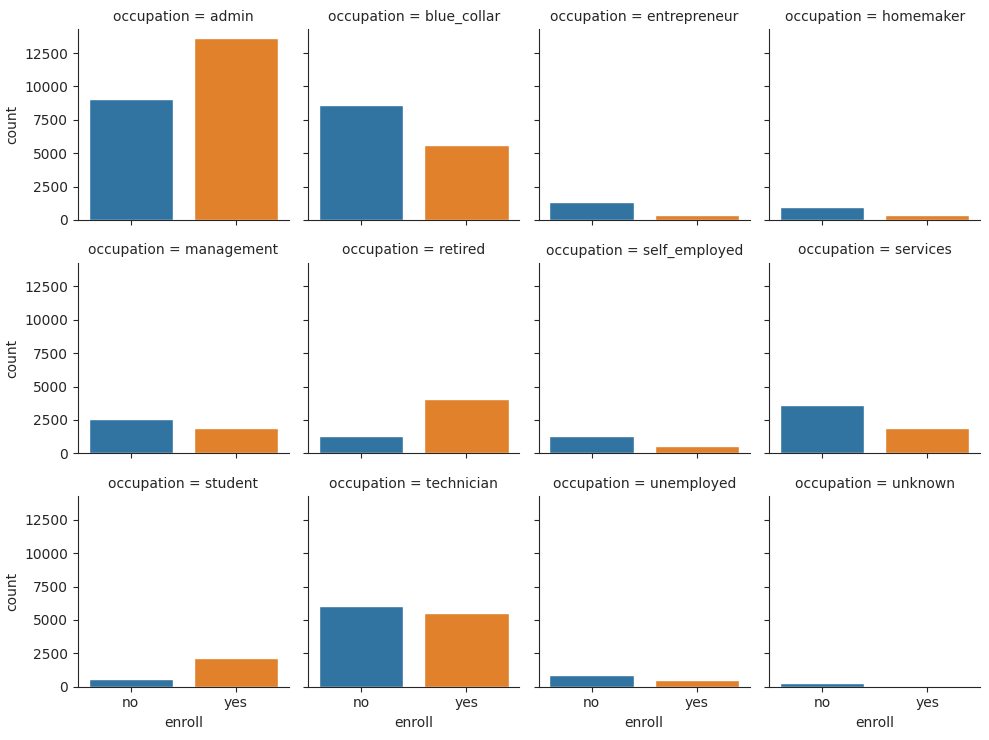

In [7]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'occupation', 'enroll')

We can see that occupations such as admin, retired, student are more likely to enroll. Whereas occupations such as blue collar, enrepeneur, home maker, self-employed are less likely to enroll.

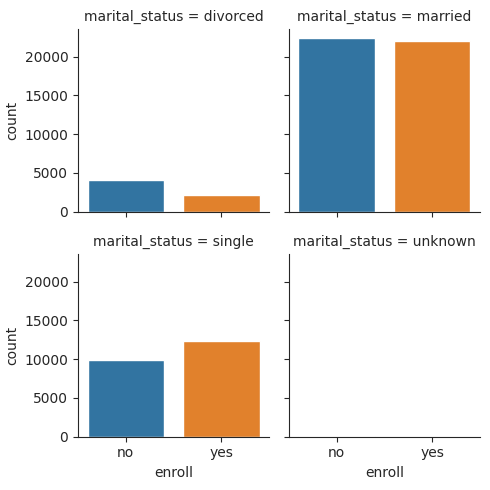

In [8]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'marital_status', 'enroll')

Singles are more likely to enroll than divorced

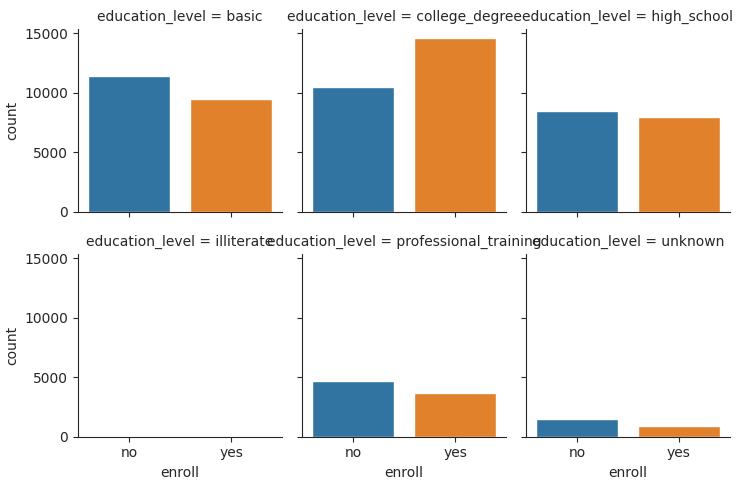

In [9]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'education_level', 'enroll')

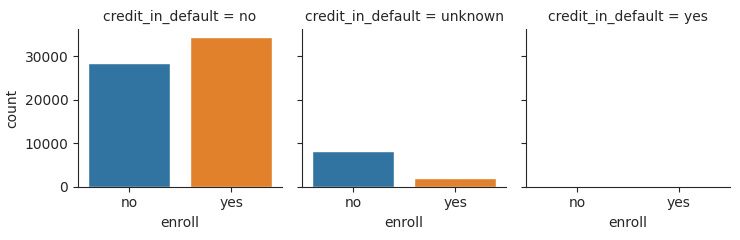

In [10]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'credit_in_default', 'enroll')

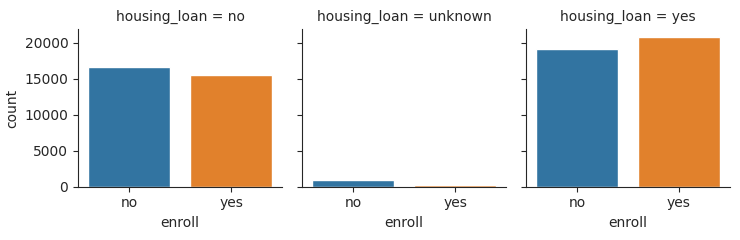

In [11]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'housing_loan', 'enroll')

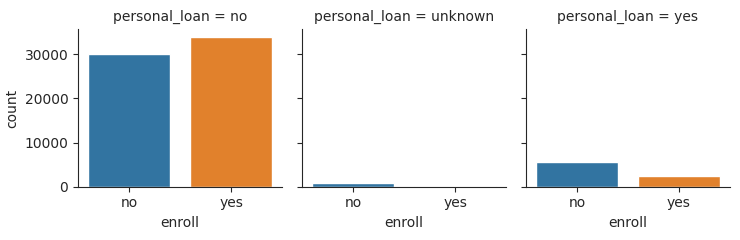

In [12]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'personal_loan', 'enroll')

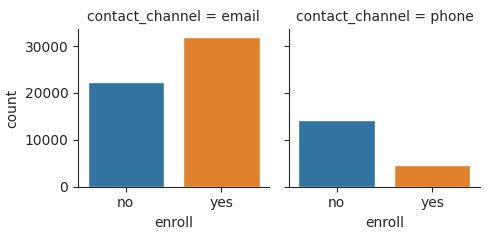

In [13]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'contact_channel', 'enroll')

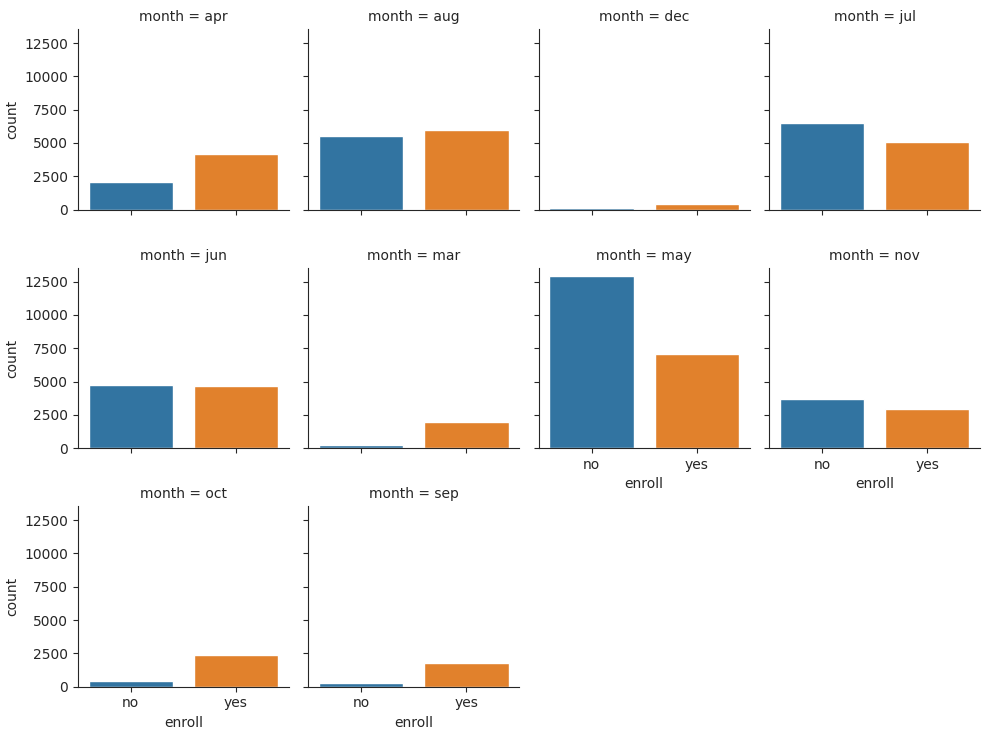

In [14]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'month', 'enroll')

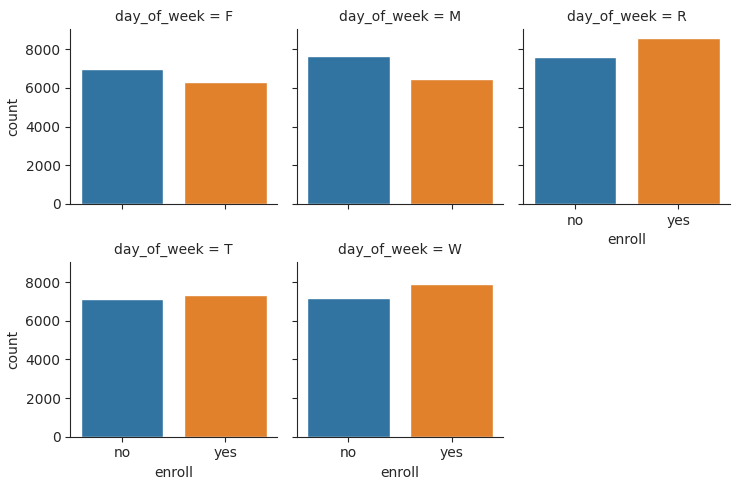

In [15]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'day_of_week', 'enroll')

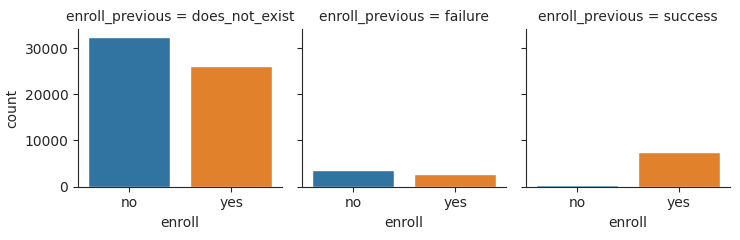

In [16]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'enroll_previous', 'enroll')

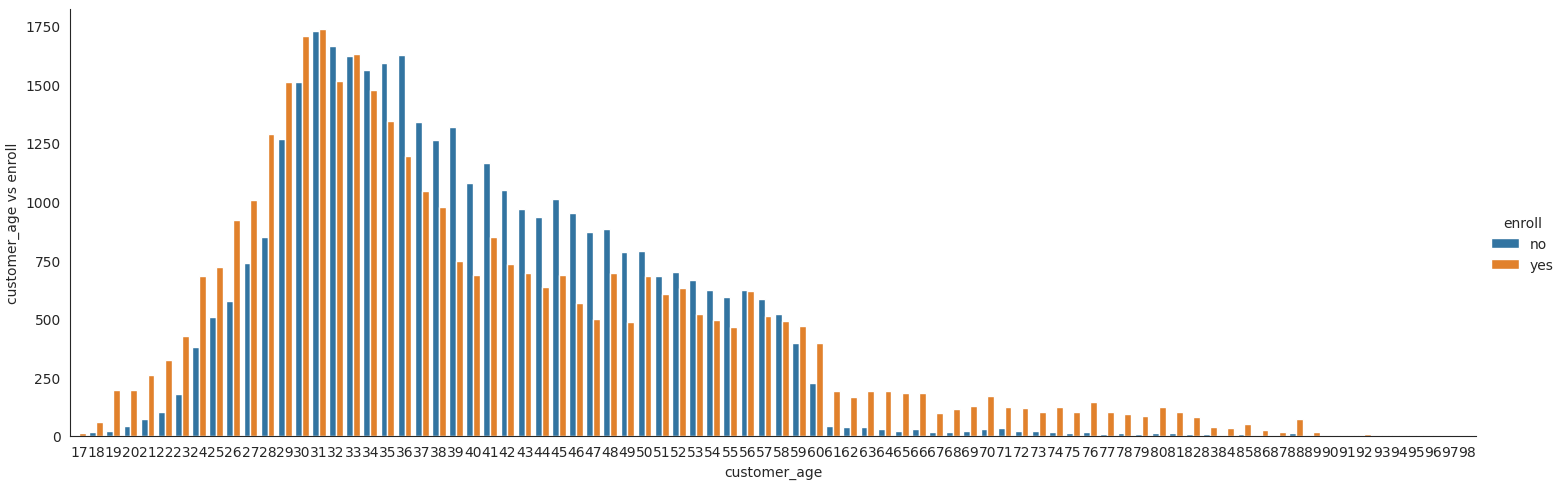

In [19]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="customer_age",
    target='enroll'
)

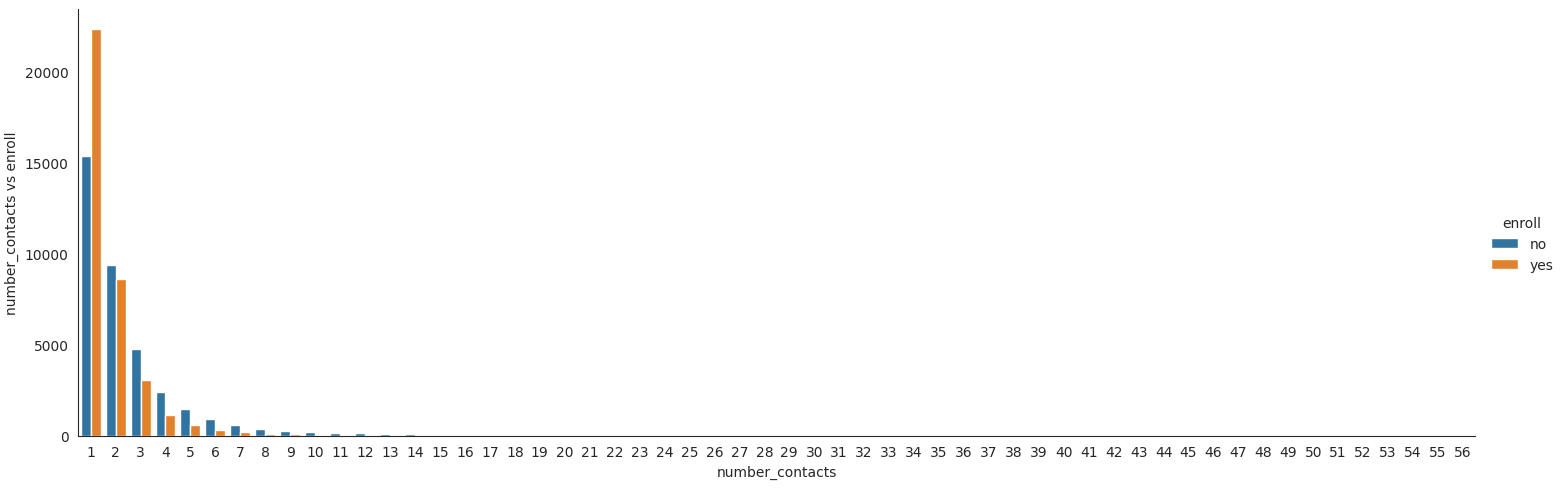

In [20]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="number_contacts",
    target='enroll'
)

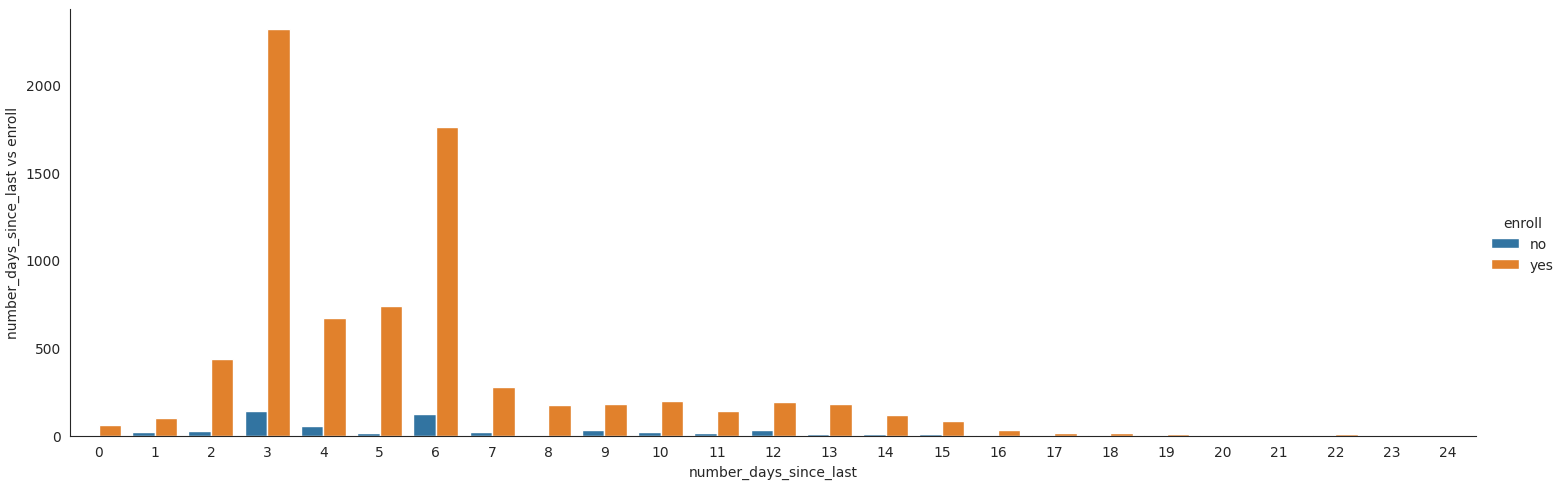

In [21]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="number_days_since_last",
    target='enroll',
    max_val=25
)

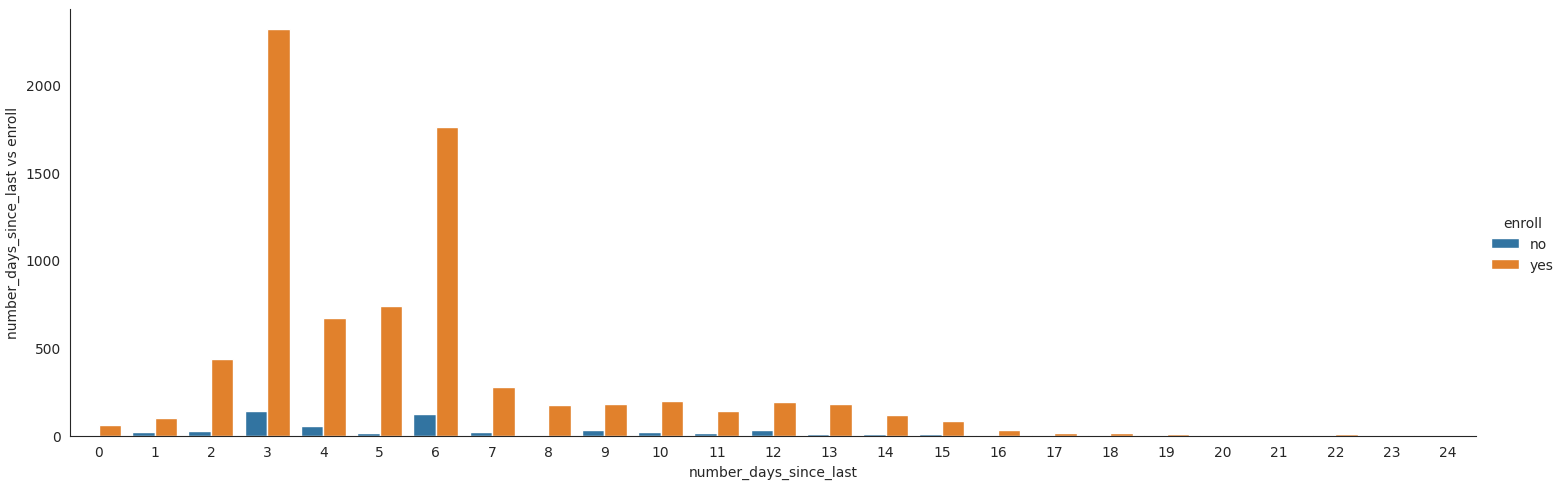

In [22]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="number_days_since_last",
    target='enroll',
    max_val=25
)

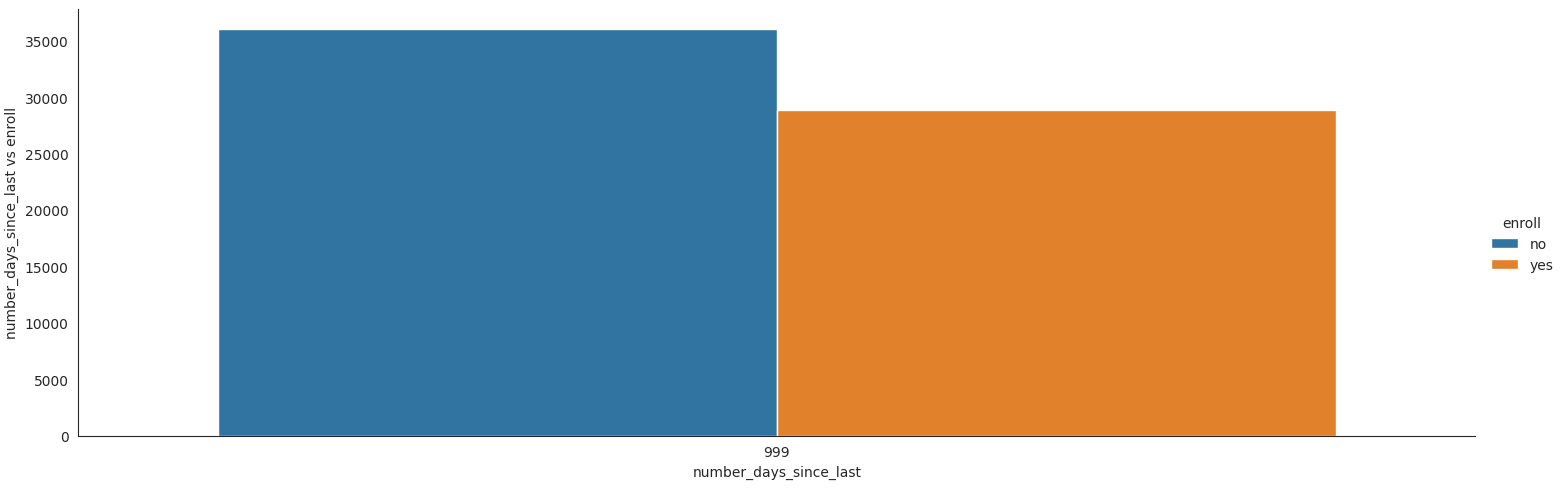

In [23]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="number_days_since_last",
    target='enroll',
    min_val=999
)

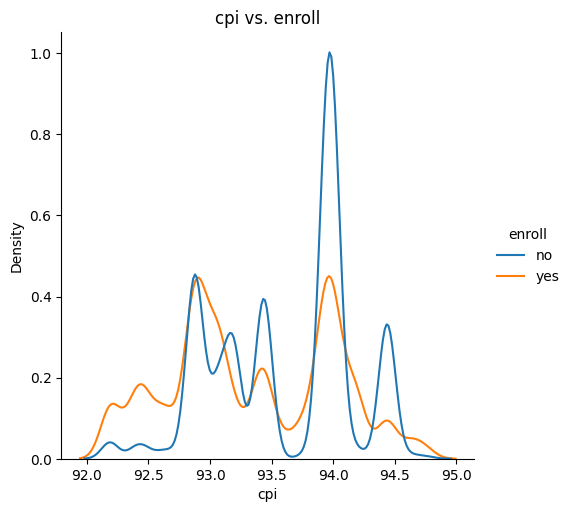

In [24]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="cpi",
    target='enroll'
)

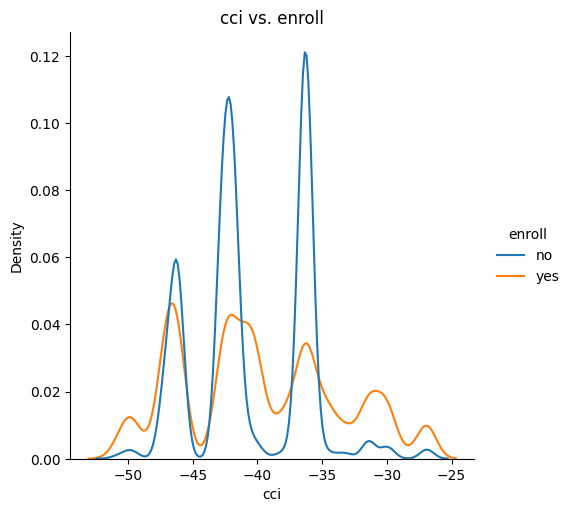

In [25]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="cci",
    target='enroll'
)

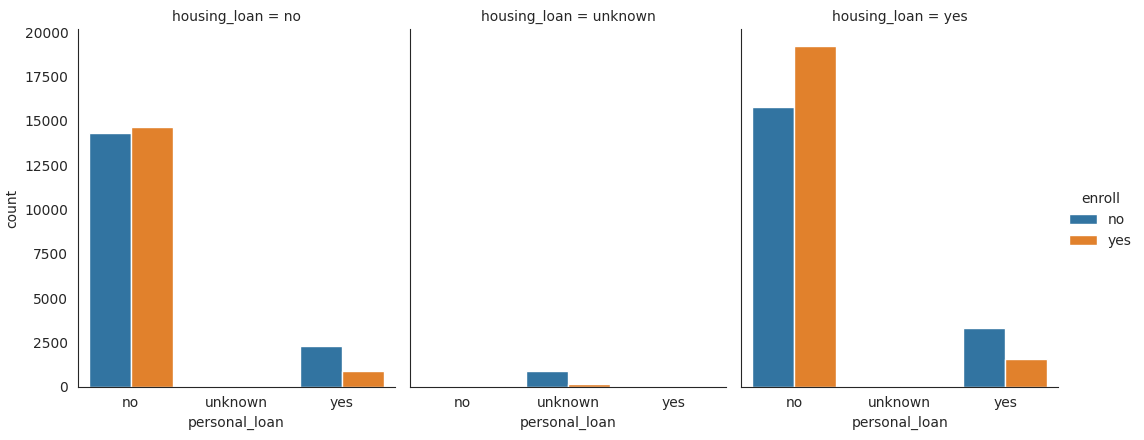

In [27]:
# cat cat
import math
import seaborn as sns

def calculate_plot_columns(df: pd.DataFrame, column: str) -> int:
    n_unique = len(df[column].unique())
    if n_unique <= 3:
        return n_unique
    return math.ceil(math.sqrt(n_unique))


with sns.axes_style('white'):    
    n = calculate_plot_columns(data_upsampled, "personal_loan")
    g = sns.catplot(
        x="personal_loan",
        hue="enroll",
        col="housing_loan",
        data=data_upsampled,
        kind="count",
        col_wrap=n,
        height=4.5,
        aspect=0.8
    )

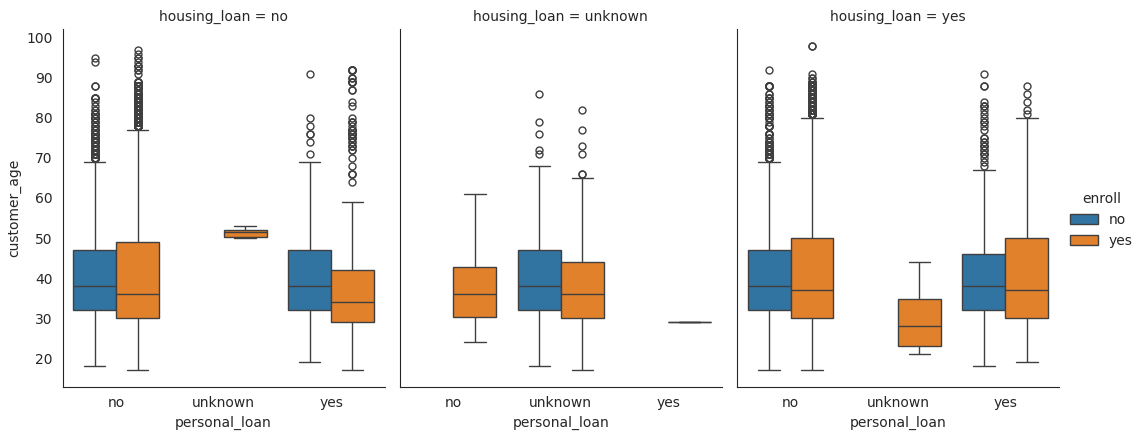

In [29]:
# cat num
import seaborn as sns

with sns.axes_style('white'):
    g = sns.catplot(
        x="personal_loan",
        y="customer_age",
        col="housing_loan",
        hue='enroll',
        data=data_upsampled,
        kind="box",
        height=4.5,
        aspect=.8
    )

<Axes: xlabel='cpi', ylabel='cci'>

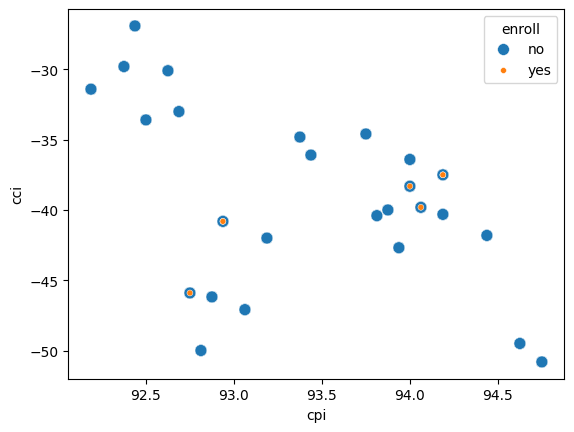

In [38]:
# num num
import seaborn as sns

sns.scatterplot(data=data, x="cpi", y="cci", hue="enroll", size="enroll")

In [ ]:
import re

type = data_upsampled['cci'].dtype.name
type = re.search("[a-z]+", type)[0]
type

'float'

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()